In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the train and test datasets with corrected file paths
train_data = pd.read_csv(""C:\Users\raju3\Downloads\9961_14084_bundle_archive\Train.csv"")
test_data = pd.read_csv(""C:\Users\raju3\Downloads\9961_14084_bundle_archive\Test.csv"")

In [3]:
# Check for missing values in the train dataset
print("\nMissing Values in Train Dataset:")
print(train_data.isnull().sum())
# Check for missing values in the test dataset
print("\nMissing Values in Test Dataset:")
print(test_data.isnull().sum())


Missing Values in Train Dataset:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Missing Values in Test Dataset:
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [4]:
# Print column names
print("Column Names:")
print(train_data.columns)

# Print the first few rows of the train dataset
print("\nFirst few rows of the Train Dataset:")
print(train_data.head())

Column Names:
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

First few rows of the Train Dataset:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950       

In [6]:
# Identify columns with missing values
missing_values = train_data.isnull().sum()
print("Columns with missing values:")
print(missing_values)

Columns with missing values:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [7]:
# Decide on a strategy for handling missing values
# Example: Fill missing values in 'Item_Weight' with mean
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
# Example: Drop rows with missing values in 'Outlet_Size'
train_data.dropna(subset=['Outlet_Size'], inplace=True)

In [8]:
# Identify and remove duplicate rows
train_data.drop_duplicates(inplace=True)


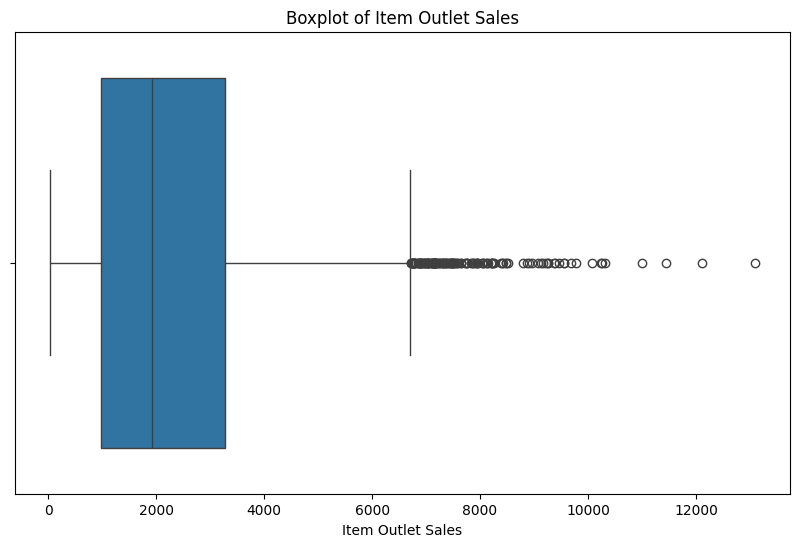

In [9]:
# Visualize distributions of numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Outlet_Sales', data=train_data)
plt.title('Boxplot of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.show()

In [10]:
# Decide on a strategy for handling outliers
# Example: Cap extreme values of 'Item_Outlet_Sales' to 95th percentile
q95 = train_data['Item_Outlet_Sales'].quantile(0.95)
train_data['Item_Outlet_Sales'] = np.where(train_data['Item_Outlet_Sales'] > q95, q95, train_data['Item_Outlet_Sales'])

In [11]:
# Ensure consistency in data formats
# Example: Convert 'Outlet_Establishment_Year' to datetime
train_data['Outlet_Establishment_Year'] = pd.to_datetime(train_data['Outlet_Establishment_Year'], format='%Y')

In [12]:
# Identify and resolve inconsistencies in categorical variables
# Example: Standardize labels in 'Item_Fat_Content'
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

In [13]:
# Example: One-Hot Encoding using pandas.get_dummies()
encoded_data = pd.get_dummies(train_data, columns=['Outlet_Type'])

In [14]:
categorical_columns = ['Outlet_Type']
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Outlet_Type']


In [15]:
# One-Hot Encoding using pandas.get_dummies()
encoded_data = pd.get_dummies(train_data, columns=categorical_columns)
print("Encoded Data:")
print(encoded_data.head())


Encoded Data:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   

      Item_Type  Item_MRP Outlet_Identifier Outlet_Establishment_Year  \
0         Dairy  249.8092            OUT049                1999-01-01   
1   Soft Drinks   48.2692            OUT018                2009-01-01   
2          Meat  141.6180            OUT049                1999-01-01   
4     Household   53.8614            OUT013                1987-01-01   
5  Baking Goods   51.4008            OUT018                2009-01-01   

  Outlet_Size Outlet_Location_Type  Item_Outlet_Sales  \
0      Medium               Tier 1          3735.1380   
1      Medium           

In [16]:
target_variable = 'Item_Outlet_Sales'

In [19]:
# Importing the necessary libraries
import pandas as pd
from sklearn import preprocessing
print("Unique values before label encoding:", train_data['Item_Fat_Content'].unique())
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()
# Encode labels in the 'Item_Fat_Content' column
train_data['Item_Fat_Content'] = label_encoder.fit_transform(train_data['Item_Fat_Content'])
# Display unique values in the 'Item_Fat_Content' column after encoding
print("Unique values after label encoding:", train_data['Item_Fat_Content'].unique())

Unique values before label encoding: [0 1]
Unique values after label encoding: [0 1]


In [23]:
# Define bin edges
bin_edges = [0, 2000, 4000, 6000, 8000, 10000, float('inf')]
# Define bin labels
bin_labels = ['0-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000', '10001+']
# Apply binning
train_data['Sales_Category'] = pd.cut(train_data['Item_Outlet_Sales'], bins=bin_edges, labels=bin_labels)

In [22]:
# Apply log transformation
train_data['Log_Item_Outlet_Sales'] = np.log1p(train_data['Item_Outlet_Sales'])
